In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning libraryries which we will use to train model and evaluate it 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df=pd.read_csv('car data.csv')  #loading dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Checking the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

<Axes: >

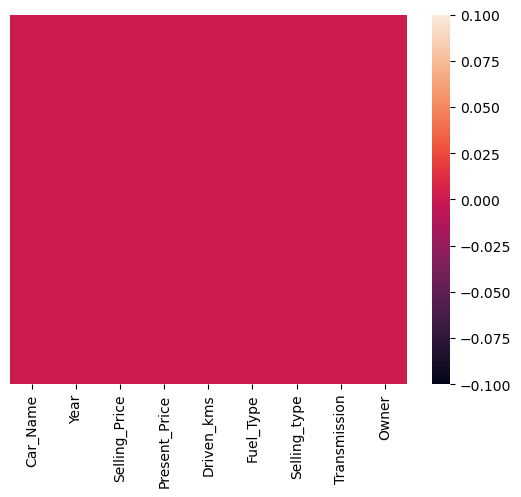

In [15]:
sns.heatmap(df.isnull(),yticklabels=False) #displaying the null vlaues by visualization

* There is no null values in any columns 

### Statistical Anlaysis

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


### Checking the correlation among the attributes


In [29]:
correlation_matrix=df[['Year','Selling_Price','Present_Price','Driven_kms']].corr()

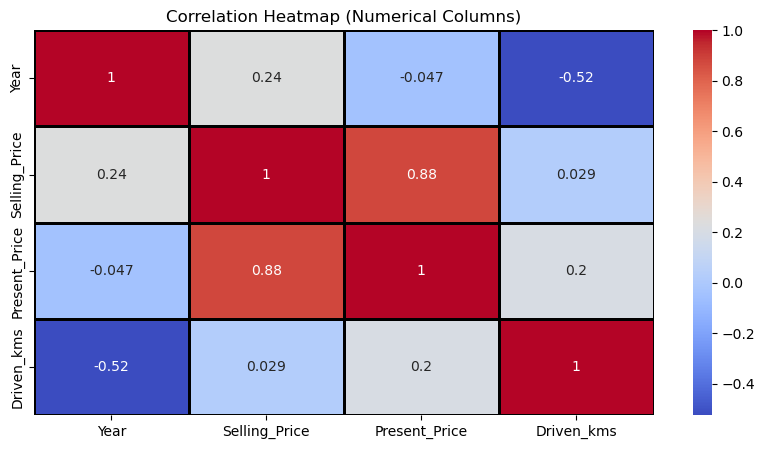

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True,linecolor='black',cmap='coolwarm',linewidths=2)
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

The observation indicates that the selling price and present price have a very strong positive correlation, suggesting a nearly perfect linear relationship. This is logical, as the current market value likely influences the selling price.

In contrast, the year of the vehicle shows a weak correlation with the present price and a negative correlation with the selling price. This aligns with the trend that newer cars (which have lower year values) usually command higher selling prices, have lower present prices, and typically have lower mileage.

Additionally, driven kilometers exhibit a weak positive correlation with both the selling price and present price.

### Plotting the disturbution of the numerical featurees

<Figure size 500x300 with 0 Axes>

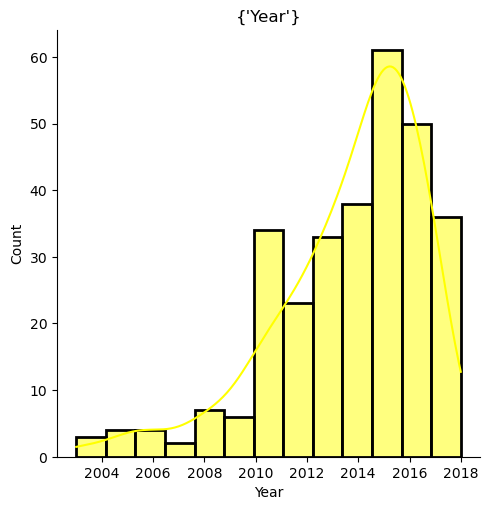

<Figure size 500x300 with 0 Axes>

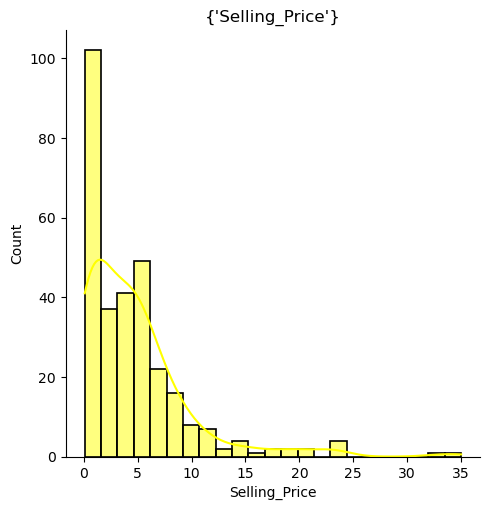

<Figure size 500x300 with 0 Axes>

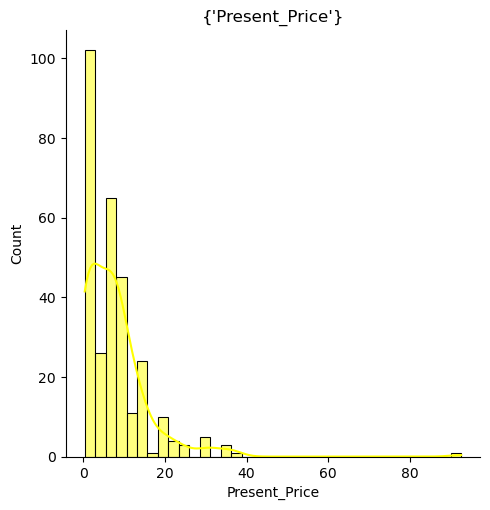

<Figure size 500x300 with 0 Axes>

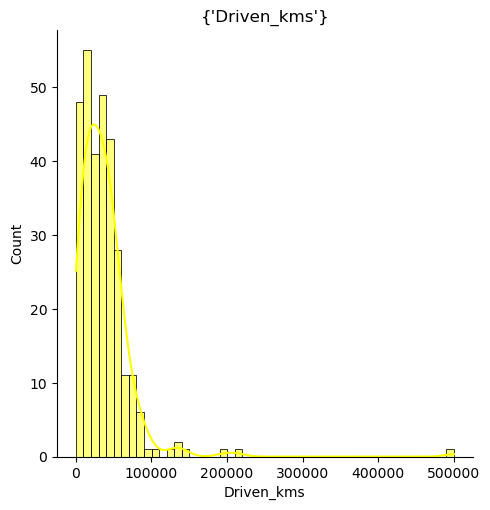

In [53]:
nf=df[['Year','Selling_Price','Present_Price','Driven_kms']]
for feature in nf:
    plt.figure(figsize=(5,3))
    sns.displot(x=feature,data=df,kde=True,color="yellow",lw=2)
    plt.title({feature})
    plt.show()
    

### Plotting the disturbution of the categorical features 

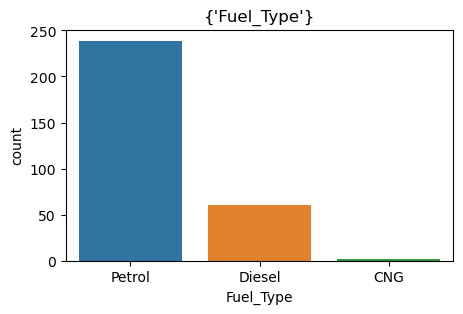

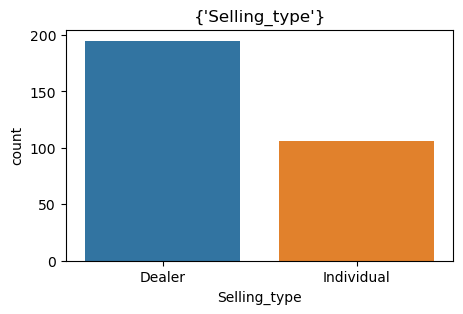

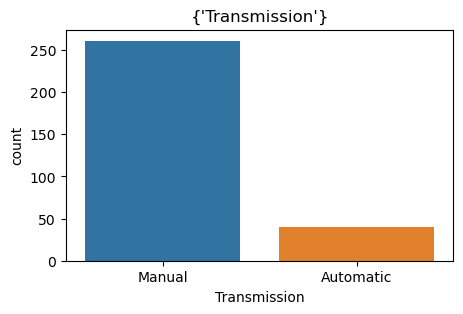

In [89]:
cf=df[['Fuel_Type', 'Selling_type', 'Transmission']]

for feature in cf:
    plt.figure(figsize=(5,3))
    sns.countplot(x=feature,data=df,palette='tab10')
    plt.title({feature})
    plt.show()




### Top car models by present price

In [65]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [77]:
top_car=df.groupby('Car_Name')['Present_Price'].mean()
x=top_car.sort_values(ascending=False).head(10)
x

Car_Name
land cruiser     92.600000
fortuner         30.732727
camry            23.730000
innova           17.846667
corolla altis    17.582500
elantra          14.790000
creta            13.600000
corolla          12.350000
city             11.791923
vitara brezza     9.830000
Name: Present_Price, dtype: float64

In [86]:
import warnings  # imported because gettung warnings after plot the bar graphs
warnings.filterwarnings('ignore')

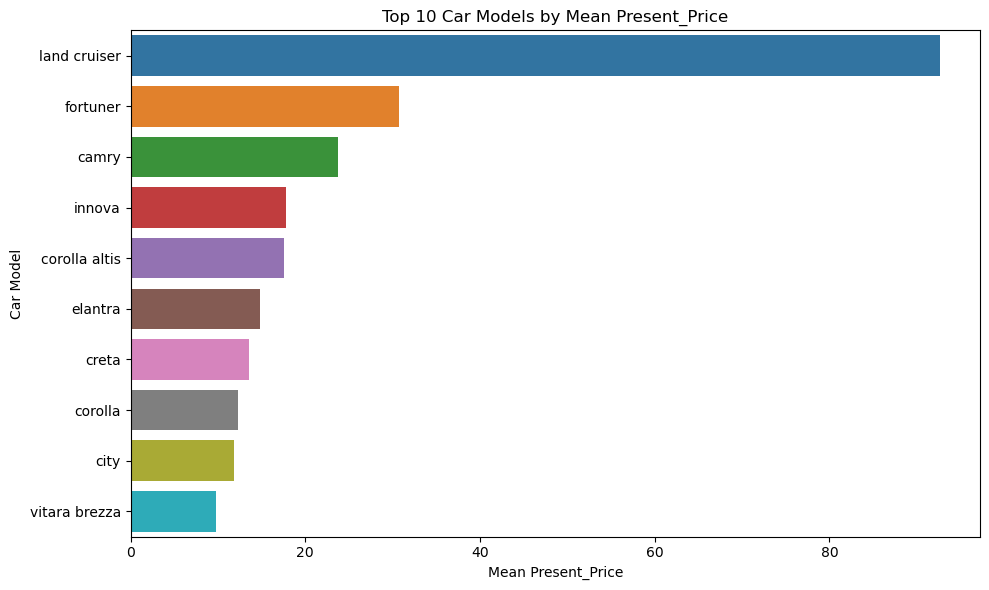

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x=x.values, y=x.index, palette='tab10',lw=2)
plt.title(f'Top {10} Car Models by Mean Present_Price')
plt.xlabel('Mean Present_Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

### Car Selling Price prediction 

In [117]:
# need to modeling the columns 
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [118]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3.5315798889733947
R-squared: 0.8466902419661761


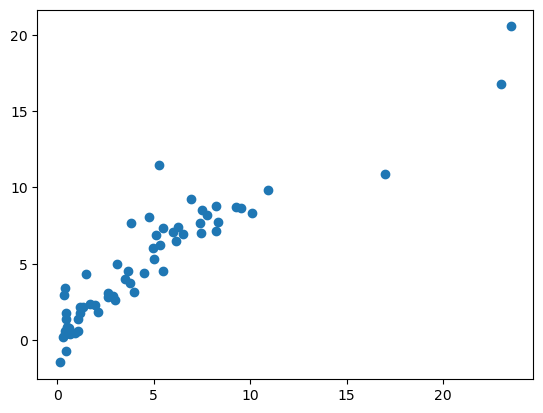

In [128]:
plt.scatter(y_test,y_pred)

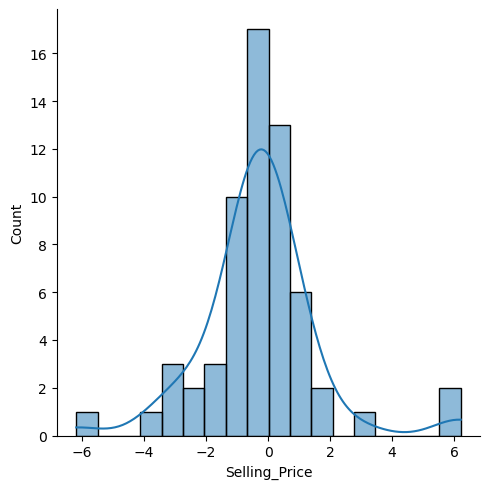

In [132]:
sns.displot(y_test-y_pred,kde=True)

### Test the prediction model 

In [134]:
new_car = [[2024, 30000, 0, 1, 1, 0, 0]]  
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 13201.568155158295
